# This notebook shows what we have done in the cleaning step

In [24]:
%matplotlib inline
import sys
sys.path.insert(1, '../../script/')

In [25]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [26]:
import cleaning as cl
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df = pd.read_csv('../../data/training.csv') 

In [28]:
cl.cleaning(df)

In [30]:
df.columns

Index(['IsBadBuy', 'VehicleAge', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'MMRAcquisitionAuctionAveragePrice', 'VNST',
       'VehBCost', 'WarrantyCost'],
      dtype='object')

## 1. What we have used for the cleaning step
### - Correlation for MMRAs

In [8]:
# correlation matrix for MMRAs
data = df.copy()
del data['IsBadBuy']
del data['VehicleAge']
del data['WheelTypeID']
del data['VehOdo']
del data['BYRNO']
del data['VehBCost']
del data['IsOnlineSale']
del data['WarrantyCost']
del data['PRIMEUNIT']
del data['AUCGUART']
del data['RefId']
del data['VNZIP1']
del data['VehYear']
del data['PurchDate']
del data['Trim']
del data['TopThreeAmericanName']
del data['WheelType']
data.corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424
MMRAcquisitionAuctionCleanPrice,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604
MMRAcquisitionRetailAveragePrice,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523
MMRAcquisitonRetailCleanPrice,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231
MMRCurrentAuctionAveragePrice,0.937482,0.923144,0.851330,0.846393,1.000000,0.990244,0.915147,0.912305
MMRCurrentAuctionCleanPrice,0.931919,0.931599,0.848776,0.854986,0.990244,1.000000,0.908620,0.921638
MMRCurrentRetailAveragePrice,0.871220,0.860055,0.912747,0.902680,0.915147,0.908620,1.000000,0.989693
MMRCurrentRetailCleanPrice,0.870424,0.870604,0.905523,0.906231,0.912305,0.921638,0.989693,1.000000


#### Best correlations
<p>Acquisition:</p>
<ul>
    <li> MMRAcquisitionAuctionAveragePrice - MMRAcquisitionAuctionCleanPrice (1)
    <li> MMRAcquisitionAuctionAveragePrice - MMRCurrentAuctionAveragePrice (2)
    <li> MMRAcquisitionAuctionCleanPrice - MMRAcquisitionAuctionAveragePrice (1)
    <li> MMRAcquisitionAuctionCleanPrice - MMRCurrentAuctionCleanPrice (2)
    <li> MMRAcquisitionRetailAveragePrice - MMRAcquisitonRetailCleanPrice (1)
    <li> MMRAcquisitionRetailAveragePrice - MMRCurrentRetailAveragePrice (2)
    <li> MMRAcquisitonRetailCleanPrice - MMRAcquisitionRetailAveragePrice (1)
    <li> MMRAcquisitonRetailCleanPrice - MMRAcquisitionAuctionCleanPrice (2)
</ul>
<p>Current:</p>
<ul>
    <li> MMRCurrentAuctionAveragePrice - MMRCurrentAuctionCleanPrice (1)
    <li> MMRCurrentAuctionAveragePrice - MMRAcquisitionAuctionAveragePrice (2)
    <li> MMRCurrentAuctionCleanPrice - MMRCurrentAuctionAveragePrice (1)
    <li> MMRCurrentAuctionCleanPrice - MMRAcquisitionAuctionAveragePrice (2)
    <li> MMRCurrentRetailAveragePrice - MMRCurrentRetailCleanPrice (1)
    <li> MMRCurrentRetailAveragePrice - MMRCurrentAuctionAveragePrice (2)
    <li> MMRCurrentRetailCleanPrice - MMRCurrentRetailAveragePrice (1)
    <li> MMRCurrentRetailCleanPrice - MMRCurrentAuctionCleanPrice (2)
</ul>

<p>IDEA:</p>
<ul>
    <li> Sostituire nan con il valore dell'attributo (non nan) con maggiore correlazione (nella stessa riga)
    <li> Sostituire nan con la meadian
</ul>

<p>Values of MMRAs to be substituted:</p>
<ul>
    <li> MMRAcquisitionAuctionAveragePrice - 0.0 (648)
    <li> MMRAcquisitionAuctionCleanPrice - 0.0 (552), 1.0 (96)
    <li> MMRAcquisitionRetailAveragePrice - 0.0 (648)
    <li> MMRAcquisitonRetailCleanPrice - 0.0 (648)
    <li> MMRCurrentAuctionAveragePrice - 0.0 (393)
    <li> MMRCurrentAuctionCleanPrice - 0.0 (300), 1.0 (93)
    <li> MMRCurrentRetailAveragePrice - 0.0 (393)
    <li> MMRCurrentRetailCleanPrice - 0.0 (393)
</ul>

## 2. The Cleaning Step:
<h5> - Missing value and Wrong values: </h5>
<ul>
    <li> Fill nan in <b>WheelTypeID</b> with a recursively groupby substitution. We have grouped all the records by ('<b>Make</b>', '<b>Model</b>', '<b>SubModel</b>') then by ('<b>Make</b>', '<b>Model</b>') and finally only by ('<b>Make</b>') and then we replaced the missing value of this attribute with the mode of each group.
    <li> Fill nan in <b>Color</b> with the mode (of <b>Color</b>)
    <li> Fill nan in <b>Transmission</b> with the mode (of <b>Transmission</b>)
    <li> Fill nan in <b>Nationality</b> with AMERICAN because noticed that most cars are of American nationality. We therefore decided to replace the missing value with the value 'AMERICAN'
    <li> Fill manually nan in <b>SubModel</b> with the mode of group by (over <b>Make</b>, <b>Model</b>, <b>Size</b>, <b>Trim</b>)
    <li> Fill manually nan in <b>Size</b> with the mode of group by (over <b>Make</b>, <b>Model</b>)
    <li> In the '<b>Transmission</b>' feature there is a typo error, we have changed Manual to MANUAL in <b>Transmission</b> (1 row)
    <li> in '<b>Make</b>' feature there is a typo error, we have changed 'TOYOTA SCION' value in  in 'SCION' in <b>Make</b> (1 row)
    <li> Change 0.0 in <b>WheelTypeID</b> with the correct value, we have seen the correct value by looking to <b>WheelType</b> feature on the same row. We check which <b>WheelType</b> was associated to that row and then checked the correct id and then substitued the 0.0 with the correct one
    <li> Fill nan in <b>MMRAs</b>: for every <b>MMRA</b> feature with have substitued the nan value by using the same value on the same row of the most correlated <b>MMRA</b> feature.
    <li> Change 0.0 and 1.0 values in <b>MMRAs</b>: first we have substitued the 0.0 and 0.1 value with the value of the same row (using correlation), after this they were still present 0.0 and 0.1 values. The remaining values have been replaced with the median of that column. (so have been treated has missing value)
    <li> Change 1.0 in <b>VehBCost</b> the only record with this value has been deleted by the removal of the outliers
</ul>
<h5> - Dropped Feature: </h5>
<ul>
    <li> Drop <b>PRIMEUNIT</b> (too many missing values)
    <li> Drop <b>AUCGUART</b> (too many missing values)
    <li> Drop <b>RefId</b> (useless)
    <li> Drop <b>VNZIP1</b> (redundant)
    <li> Drop <b>VehYear</b> 
    <li> Drop <b>PurchDate</b> (VehAge = PurchDate - VehYear) (redundant)
    <li> Drop <b>Trim</b> (useless + missing values)
    <li> Drop <b>TopThreeAmericanName</b> (useless)
    <li> Drop <b>WheelType</b> (redundant)
    <li> Drop <b>BYRNO</b> (useless unique id)
</ul>

<h5> - Outliers: </h5>
This feature have outliers:

    'VehOdo',
    'MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice', 
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice',
    'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice',
    'MMRCurrentRetailCleanPrice',
    'VehBCost',
    'WarrantyCost',
    'VehicleAge'

For every features above we have:

For all the record with `isBadBuy == 0` we calculate the low and high quartile of the distribution of data, and we have dropped every row of that feature with `value <= high_quartile` and then we dropped all the row with `value >= low_quartile`, then we did the same for `isBadBuy == 1`


### All these operation are perfomed by the `cleaning.py` file in `src` folder.

## 3. Information on the new dataset after cleaning step:
The new dataset has 54469 entry and 24 features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 58385
Data columns (total 11 columns):
IsBadBuy                             55494 non-null int64
VehicleAge                           55494 non-null int64
Transmission                         55494 non-null object
WheelTypeID                          55494 non-null float64
VehOdo                               55494 non-null int64
Nationality                          55494 non-null object
Size                                 55494 non-null object
MMRAcquisitionAuctionAveragePrice    55494 non-null float64
VNST                                 55494 non-null object
VehBCost                             55494 non-null float64
WarrantyCost                         55494 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 5.1+ MB


Check if the dataset has missing values:

In [22]:
df.isnull().any()

IsBadBuy                             False
Auction                              False
VehicleAge                           False
Make                                 False
Model                                False
SubModel                             False
Color                                False
Transmission                         False
WheelTypeID                          False
VehOdo                               False
Nationality                          False
Size                                 False
MMRAcquisitionAuctionAveragePrice    False
MMRAcquisitionAuctionCleanPrice      False
MMRAcquisitionRetailAveragePrice     False
MMRAcquisitonRetailCleanPrice        False
MMRCurrentAuctionAveragePrice        False
MMRCurrentAuctionCleanPrice          False
MMRCurrentRetailAveragePrice         False
MMRCurrentRetailCleanPrice           False
VNST                                 False
VehBCost                             False
IsOnlineSale                         False
WarrantyCos

### Check on the remaining features:
### - VehBCost strange value:

In [25]:
df[df['VehBCost']<=100]['VehBCost'].value_counts()

Series([], Name: VehBCost, dtype: int64)

### - WheelTypeID value at 0.0 

In [26]:
df.WheelTypeID.value_counts()

1.0    27359
2.0    26576
3.0      534
Name: WheelTypeID, dtype: int64

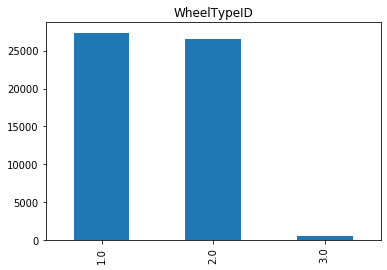

In [25]:
df['WheelTypeID'].value_counts().plot(kind='bar', title='WheelTypeID')
plt.show()

### - Transmission, 'manual' typo check

In [29]:
df.Transmission.value_counts()

AUTO      52555
MANUAL     1914
Name: Transmission, dtype: int64

### - MMRAcquisitionAuctionAveragePrice 0.0 and 1.0 value check

In [21]:
print(df[(df['MMRAcquisitionAuctionAveragePrice'] == 0.0) | (df['MMRAcquisitionAuctionAveragePrice'] == 1.0)]['MMRAcquisitionAuctionAveragePrice'].value_counts())

Series([], Name: MMRAcquisitionAuctionAveragePrice, dtype: int64)


### The new distribution for the features with outliers:

### - MMRAcquisitionAuctionAveragePrice distribution

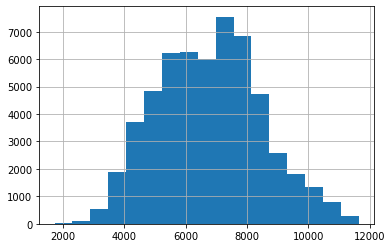

In [23]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=17)

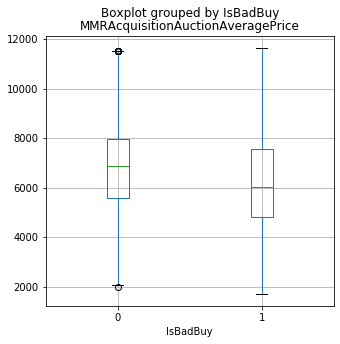

In [22]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], figsize=(5,5), by='IsBadBuy')

### - VehOdo, VehBCost, WarrantyCost, VehicleAge distribution

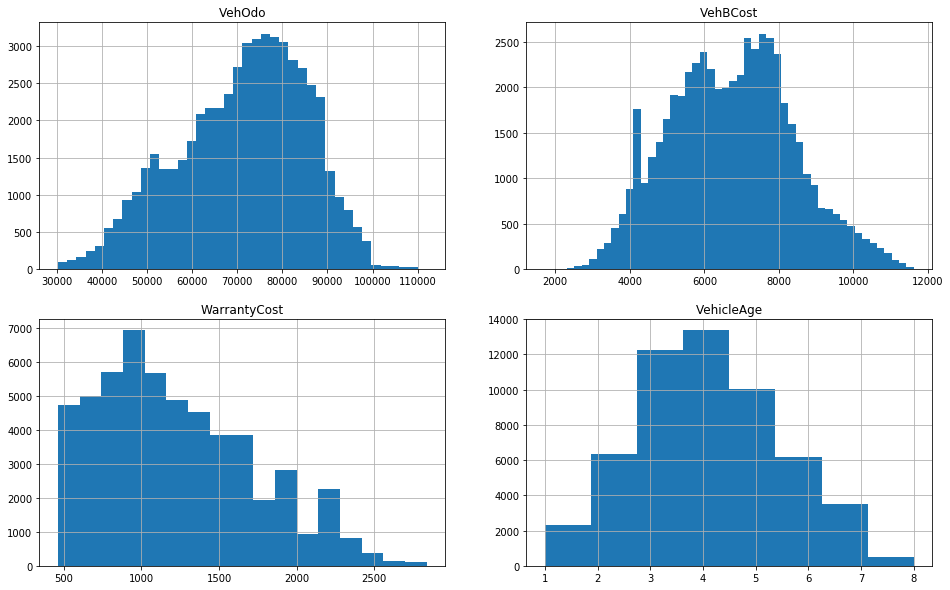

In [22]:
fig = plt.figure(figsize=(16, 10)) # any figure has 10x10 size
fig_dims = (2, 2) # 2 rows and 4 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['VehOdo'].hist(bins = 40)
plt.title('VehOdo')

plt.subplot2grid(fig_dims, (0, 1))
df['VehBCost'].hist(bins = 50)
plt.title('VehBCost')

plt.subplot2grid(fig_dims, (1, 0))
df['WarrantyCost'].hist(bins = b)
plt.title('WarrantyCost')

plt.subplot2grid(fig_dims, (1, 1))
df['VehicleAge'].hist(bins = 8)
plt.title('VehicleAge')

plt.show()

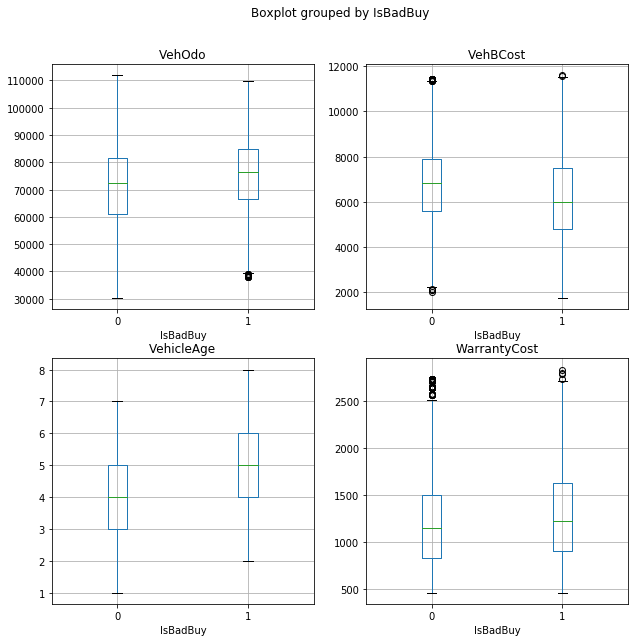

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) # create 2x2 array of subplots

df.boxplot(column=['VehOdo'], figsize=(4,6), by='IsBadBuy', ax=axes[0,0])
plt.title('VehOdo')

df.boxplot(column=['VehBCost'], figsize=(5,6), by='IsBadBuy', ax=axes[0,1])
plt.title('VehBCost')

df.boxplot(column=['VehicleAge'], figsize=(5,6), by='IsBadBuy', ax=axes[1,0])
plt.title('VehicleAge')

df.boxplot(column=['WarrantyCost'], figsize=(5,6), by='IsBadBuy', ax=axes[1,1])
plt.title('WarrantyCost')
plt.show()

## NOTE
Other features that could be dropped:
 - Auction
 - IsOnlineSale
 - submodel
 
we have to decide what to do about these feature, maybe clustering could help.

Other correction:
 - in **Nationality** feature there is 'TOP LINE ASIAN' and 'OTHER ASIAN' value, maybe could be a good idea to merge both to 'ASIAN' value. Could be this usefull somehow? Could this be wrog for classification for the future prediction?